In [1]:
import matplotlib.pyplot as plt
from dolfin import *

# Using built in functions to check whether libraries are available
if not has_linear_algebra_backend("PETSc"):
    print("DOLFIN has not been configured with PETSc. Exiting.")
    exit()

if not has_slepc():
    print("DOLFIN has not been configured with SLEPc. Exiting.")
    exit()

In [2]:
# reading an external mesh
mesh = Mesh("box_with_dent.xml.gz")
mesh

In [3]:
V = FunctionSpace(mesh, "Lagrange", 1)

# Define basis and bilinear form
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v))*dx

# Assemble stiffness form
A = PETScMatrix()
assemble(a, tensor=A)

In [4]:
# Create eigensolver
eigensolver = SLEPcEigenSolver(A)

# Compute all eigenvalues of A x = \lambda x
print("Computing eigenvalues. This can take a minute.")
eigensolver.solve()

Computing eigenvalues. This can take a minute.


In [5]:
# Extract largest (first) eigenpair
r, c, rx, cx = eigensolver.get_eigenpair(0)

Largest eigenvalue:  10.027944485404916


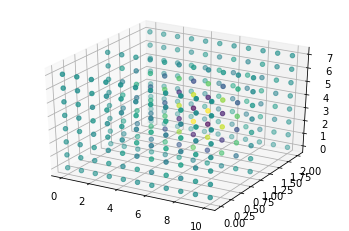

In [6]:
print("Largest eigenvalue: ", r)

# Initialize function and assign eigenvector
u = Function(V)
u.vector()[:] = rx

# Plot eigenfunction
plot(u)
plt.show()